```{contents}

```

## Parametric vs. Non-Parametric Tests

---

### Parametric Tests

* **Definition:** Statistical tests that assume the data follows a specific probability distribution, usually the **normal distribution**.
* **Requirements/Assumptions:**

  * Data should be on an **interval or ratio scale**.
  * Data should be approximately **normally distributed**.
  * **Homogeneity of variance** (equal variances across groups).
  * Observations are **independent**.
* **Examples:**

  * **t-test** (one-sample, two-sample, paired)
  * **ANOVA** (Analysis of Variance)
  * **Pearson correlation**
  * **Linear regression**
* **Advantages:**

  * More powerful (detects smaller effects).
  * Provides estimates like means and standard deviations.
* **Limitations:**

  * Not robust to violations of assumptions (normality, equal variance).

---

### Non-Parametric Tests

* **Definition:** Statistical tests that do **not assume a specific distribution** of the data.
* **When used:**

  * Data is **ordinal** (ranked) or **nominal**.
  * Data is **not normally distributed**.
  * Small sample sizes.
  * Presence of **outliers** or skewed data.
* **Examples:**

  * **Mann–Whitney U test** (non-parametric alternative to independent t-test)
  * **Wilcoxon signed-rank test** (alternative to paired t-test)
  * **Kruskal–Wallis test** (alternative to one-way ANOVA)
  * **Spearman’s rank correlation** or **Kendall’s tau** (alternative to Pearson correlation)
* **Advantages:**

  * No strict distributional assumptions.
  * Robust against outliers.
* **Limitations:**

  * Less powerful compared to parametric tests when assumptions of parametric tests are met.
  * Results often expressed in terms of **ranks** rather than means.

---

### Key Difference Summary

| Feature                 | Parametric Tests                       | Non-Parametric Tests                   |
| ----------------------- | -------------------------------------- | -------------------------------------- |
| Distribution assumption | Assumes normal distribution            | No distribution assumption             |
| Data type               | Interval or ratio                      | Ordinal, nominal, interval, ratio      |
| Examples                | t-test, ANOVA, Pearson                 | Mann-Whitney, Kruskal-Wallis, Spearman |
| Power                   | Higher (if assumptions met)            | Lower                                  |
| Robustness              | Sensitive to violations of assumptions | Robust to outliers and skewed data     |



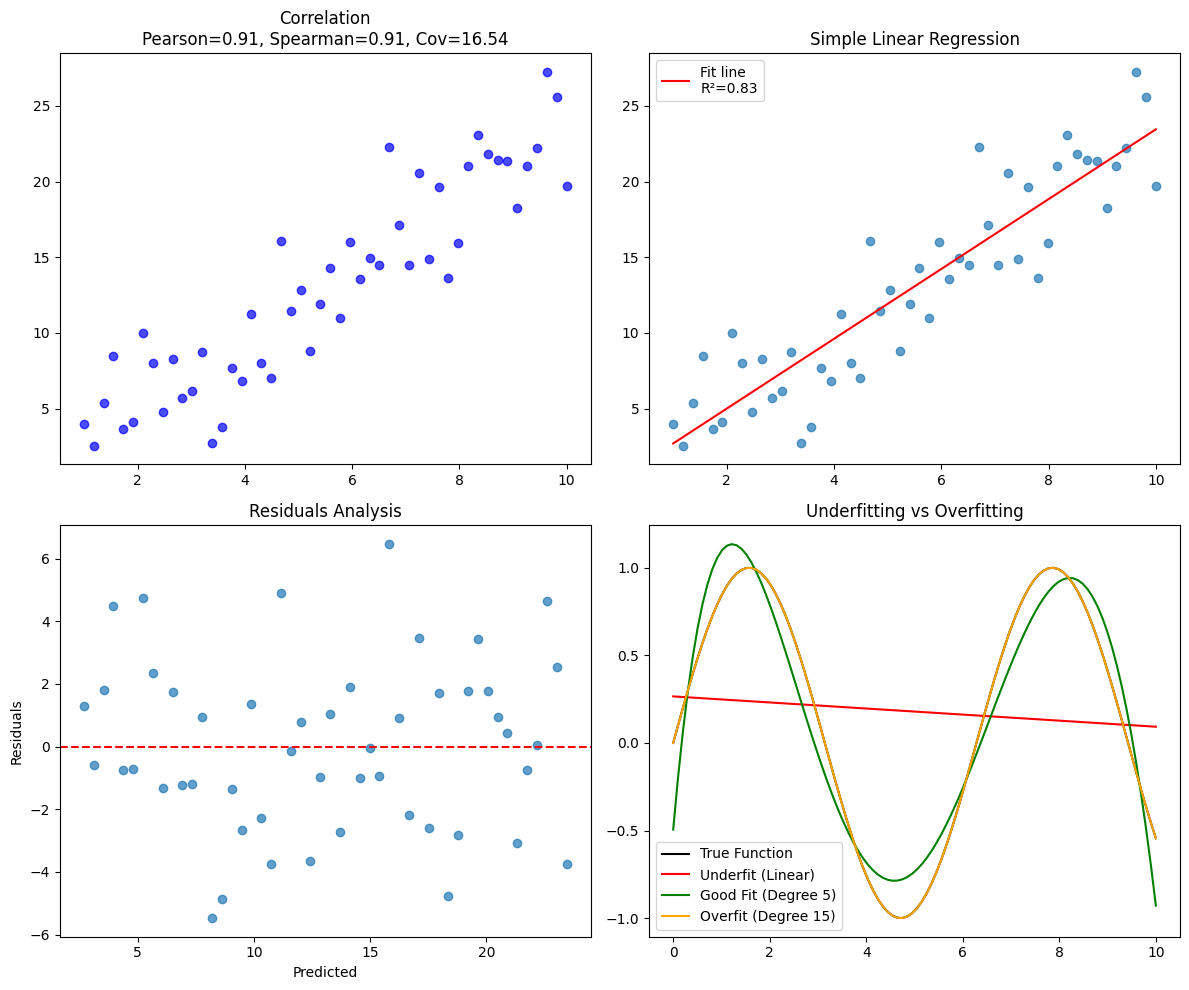

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(1, 10, 50)
Y = 2.5 * X + np.random.normal(0, 3, 50)  # linear relation with noise

# Multiple regression synthetic dataset
X1 = np.linspace(1, 10, 50)
X2 = np.random.uniform(0, 10, 50)
Y_multi = 1.5 * X1 + 2.0 * X2 + np.random.normal(0, 4, 50)

# Pearson & Spearman correlation
pearson_corr = np.corrcoef(X, Y)[0,1]
spearman_corr = pd.Series(X).corr(pd.Series(Y), method='spearman')
cov_xy = np.cov(X, Y)[0,1]

# Linear regression fit
X_reshaped = X.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X_reshaped, Y)
Y_pred = lin_reg.predict(X_reshaped)
r2 = r2_score(Y, Y_pred)

# Plots
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# Correlation scatter
axes[0,0].scatter(X, Y, color="blue", alpha=0.7)
axes[0,0].set_title(f"Correlation\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}, Cov={cov_xy:.2f}")

# Simple Linear Regression
axes[0,1].scatter(X, Y, alpha=0.7)
axes[0,1].plot(X, Y_pred, color="red", label=f"Fit line\nR²={r2:.2f}")
axes[0,1].legend()
axes[0,1].set_title("Simple Linear Regression")

# Residual plot
residuals = Y - Y_pred
axes[1,0].scatter(Y_pred, residuals, alpha=0.7)
axes[1,0].axhline(0, color="red", linestyle="--")
axes[1,0].set_title("Residuals Analysis")
axes[1,0].set_xlabel("Predicted")
axes[1,0].set_ylabel("Residuals")

# Overfitting vs Underfitting illustration
x_curve = np.linspace(0,10,100)
y_true = np.sin(x_curve)
y_underfit = np.poly1d(np.polyfit(x_curve, y_true, 1))(x_curve)
y_goodfit = np.poly1d(np.polyfit(x_curve, y_true, 5))(x_curve)
y_overfit = np.poly1d(np.polyfit(x_curve, y_true, 15))(x_curve)

axes[1,1].plot(x_curve, y_true, label="True Function", color="black")
axes[1,1].plot(x_curve, y_underfit, label="Underfit (Linear)", color="red")
axes[1,1].plot(x_curve, y_goodfit, label="Good Fit (Degree 5)", color="green")
axes[1,1].plot(x_curve, y_overfit, label="Overfit (Degree 15)", color="orange")
axes[1,1].legend()
axes[1,1].set_title("Underfitting vs Overfitting")

plt.tight_layout()
plt.show()


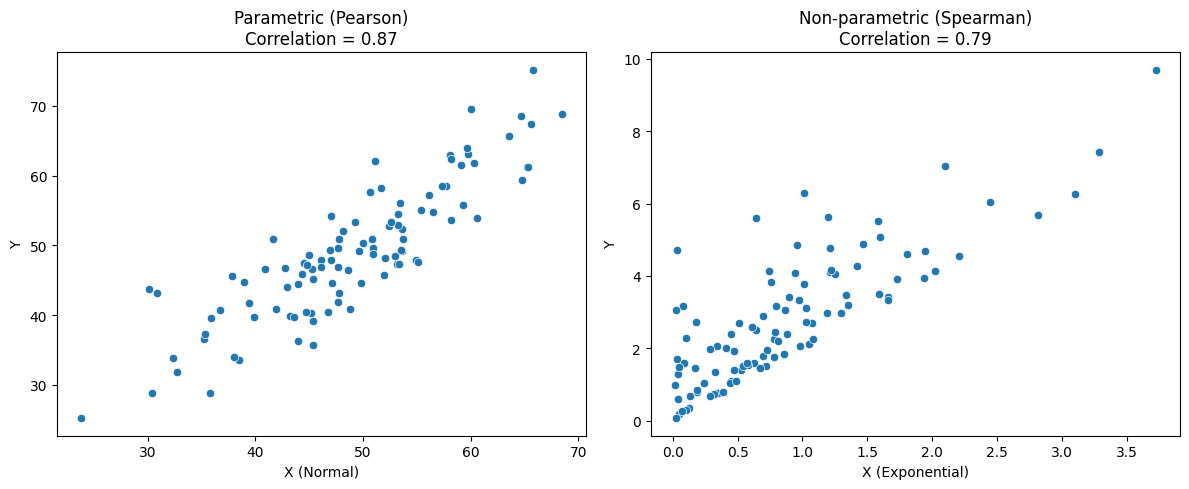

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate synthetic data
np.random.seed(42)
x_param = np.random.normal(50, 10, 100)  # Normal distribution
y_param = x_param + np.random.normal(0, 5, 100)

x_nonparam = np.random.exponential(1, 100)  # Skewed distribution
y_nonparam = x_nonparam * 2 + np.random.exponential(1, 100)

# Calculate correlations
pearson_corr, _ = stats.pearsonr(x_param, y_param)
spearman_corr, _ = stats.spearmanr(x_nonparam, y_nonparam)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Parametric case (Pearson)
sns.scatterplot(x=x_param, y=y_param, ax=axes[0])
axes[0].set_title(f"Parametric (Pearson)\nCorrelation = {pearson_corr:.2f}")
axes[0].set_xlabel("X (Normal)")
axes[0].set_ylabel("Y")

# Non-parametric case (Spearman)
sns.scatterplot(x=x_nonparam, y=y_nonparam, ax=axes[1])
axes[1].set_title(f"Non-parametric (Spearman)\nCorrelation = {spearman_corr:.2f}")
axes[1].set_xlabel("X (Exponential)")
axes[1].set_ylabel("Y")

plt.tight_layout()
plt.show()
